In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv("data/mer_weather2.csv")

In [3]:
data.head()

,timestamp,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,2016-01-01 00:00:00,59.416239,2.0,15.6,-5.6,0.0,1015.3,270.0,3.6
1,2016-01-01 01:00:00,59.299878,2.0,13.9,-5.6,0.0,1015.6,270.0,4.1
2,2016-01-01 02:00:00,60.380122,2.0,13.3,-5.6,0.0,1016.0,270.0,3.1
3,2016-01-01 03:00:00,62.482302,2.0,12.2,-6.1,0.0,1016.6,280.0,3.1
4,2016-01-01 04:00:00,64.023207,2.0,11.7,-6.7,0.0,1017.0,270.0,3.1


In [4]:
data.isnull().sum()

timestamp             0
meter_reading         0
site_id               1
air_temperature       1
dew_temperature       1
precip_depth_1_hr     1
sea_level_pressure    1
wind_direction        1
wind_speed            1
dtype: int64

In [5]:
exo2 =data[['timestamp','air_temperature','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_speed']]
exo2 = exo2.fillna(method='bfill')

In [6]:
exo2.head()

,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
0,2016-01-01 00:00:00,15.6,-5.6,0.0,1015.3,3.6
1,2016-01-01 01:00:00,13.9,-5.6,0.0,1015.6,4.1
2,2016-01-01 02:00:00,13.3,-5.6,0.0,1016.0,3.1
3,2016-01-01 03:00:00,12.2,-6.1,0.0,1016.6,3.1
4,2016-01-01 04:00:00,11.7,-6.7,0.0,1017.0,3.1


In [7]:
tmp_total_2= data.copy()
tmp_total_2['timestamp'] = pd.to_datetime(tmp_total_2['timestamp'])

In [8]:
tmp_total_2 = tmp_total_2.set_index("timestamp")

In [9]:
tmp_total_2.shape

(8784, 8)

In [10]:
tmp_total_2.head()

,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,59.416239,2.0,15.6,-5.6,0.0,1015.3,270.0,3.6
2016-01-01 01:00:00,59.299878,2.0,13.9,-5.6,0.0,1015.6,270.0,4.1
2016-01-01 02:00:00,60.380122,2.0,13.3,-5.6,0.0,1016.0,270.0,3.1
2016-01-01 03:00:00,62.482302,2.0,12.2,-6.1,0.0,1016.6,280.0,3.1
2016-01-01 04:00:00,64.023207,2.0,11.7,-6.7,0.0,1017.0,270.0,3.1


In [11]:
daily_total2 = tmp_total_2.resample("D").sum()

In [12]:
daily_total2 = daily_total2.reset_index()

In [13]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [14]:
import holidays
date_tmp = daily_total2['timestamp']
date_tmp2 = date_tmp.dt.strftime("%Y-%m-%d")

df_holidays = pd.DataFrame(holidays.UnitedStates(years=2016).keys())
holiday_dummy_list = [ 1 if i in list(pd.to_datetime(df_holidays[0])) else 0 for i in list(pd.to_datetime(date_tmp2))]
daily_total2['holiday'] = pd.DataFrame({'holiday' : holiday_dummy_list})

In [15]:
import calendar

tmp_date = daily_total2.copy()
tmp_date = tmp_date.rename(columns = {'timestamp' : 'weekday'})
tmp_date= pd.DataFrame(tmp_date.set_index('weekday').index.weekday)


dum_day_of_week = pd.get_dummies(tmp_date['weekday'].apply(lambda x: calendar.day_name[x]))

In [16]:
daily_total2 = pd.concat([daily_total2,dum_day_of_week], axis = 1)

In [17]:
daily_total2.head()

,timestamp,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2016-01-01,1459.873991,48.0,234.3,-110.9,0.0,24426.4,1770.0,21.5,1,1,0,0,0,0,0,0
1,2016-01-02,1558.762428,48.0,331.2,2.0,0.0,24466.1,2590.0,79.4,0,0,0,1,0,0,0,0
2,2016-01-03,1514.684680,48.0,369.5,-1.0,0.0,24418.5,2140.0,91.7,0,0,0,0,1,0,0,0
3,2016-01-04,1797.643935,48.0,376.6,49.1,28.0,24261.2,2340.0,92.1,0,0,1,0,0,0,0,0
4,2016-01-05,1759.176724,48.0,296.3,237.6,40.0,24305.5,2960.0,87.3,0,0,0,0,0,0,1,0


In [18]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

In [19]:
scaled_daily_total2 = daily_total2.copy()

In [20]:
float_array = scaled_daily_total2.iloc[:,1].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,1]=scaled_array


In [21]:
float_array = scaled_daily_total2.iloc[:,3].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,3]=scaled_array


In [22]:
float_array = scaled_daily_total2.iloc[:,4].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,4]=scaled_array


In [23]:
float_array = scaled_daily_total2.iloc[:,5].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,5]=scaled_array


In [24]:
float_array = scaled_daily_total2.iloc[:,6].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,6]=scaled_array


In [25]:
float_array = scaled_daily_total2.iloc[:,7].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,7]=scaled_array


In [26]:
float_array = scaled_daily_total2.iloc[:,8].values.astype(float)
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1,1))
scaled_daily_total2.iloc[:,8]=scaled_array


In [27]:
scaled_daily_total2.head()

,timestamp,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2016-01-01,0.033058,48.0,0.063726,0.171177,0.029630,0.831478,0.046512,0.007937,1,1,0,0,0,0,0,0
1,2016-01-02,0.066120,48.0,0.187973,0.319496,0.029630,0.862596,0.193202,0.361416,0,0,0,1,0,0,0,0
2,2016-01-03,0.051383,48.0,0.237082,0.315554,0.029630,0.825286,0.112701,0.436508,0,0,0,0,1,0,0,0
3,2016-01-04,0.145984,48.0,0.246185,0.381372,0.237037,0.701991,0.148479,0.438950,0,0,1,0,0,0,0,0
4,2016-01-05,0.133124,48.0,0.143223,0.629007,0.325926,0.736714,0.259392,0.409646,0,0,0,0,0,0,1,0


In [28]:
scaled_daily_total2 =  scaled_daily_total2.set_index("timestamp")

In [29]:
upper_outlier = scaled_daily_total2.air_temperature >= scaled_daily_total2.air_temperature.quantile(q=0.90)
lower_outlier = scaled_daily_total2.air_temperature <= scaled_daily_total2.air_temperature.quantile(q=0.1)

upper_outlier = upper_outlier.astype('int64')
lower_outlier = lower_outlier.astype('int64')

In [30]:
scaled_daily_total2['hot'] = upper_outlier
scaled_daily_total2['cold'] = lower_outlier

In [31]:
scaled_daily_total2['cold_temperature'] = scaled_daily_total2.meter_reading * scaled_daily_total2.cold
scaled_daily_total2['hot_temperature'] =scaled_daily_total2.meter_reading * scaled_daily_total2.hot

In [32]:
scaled_daily_total2['cold_temperature^2'] = scaled_daily_total2.cold_temperature**2
scaled_daily_total2['hot_temperature^2'] =scaled_daily_total2.hot_temperature**2

In [33]:
scaled_daily_total2['winter'] = 0

In [34]:
scaled_daily_total2.index.get_loc('2016-02-28')

58

In [35]:
scaled_daily_total2.shape

(366, 23)

In [36]:
scaled_daily_total2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2016-01-01 to 2016-12-31
Data columns (total 23 columns):
meter_reading         366 non-null float64
site_id               366 non-null float64
air_temperature       366 non-null float64
dew_temperature       366 non-null float64
precip_depth_1_hr     366 non-null float64
sea_level_pressure    366 non-null float64
wind_direction        366 non-null float64
wind_speed            366 non-null float64
holiday               366 non-null int64
Friday                366 non-null uint8
Monday                366 non-null uint8
Saturday              366 non-null uint8
Sunday                366 non-null uint8
Thursday              366 non-null uint8
Tuesday               366 non-null uint8
Wednesday             366 non-null uint8
hot                   366 non-null int64
cold                  366 non-null int64
cold_temperature      366 non-null float64
hot_temperature       366 non-null float64
cold_temperature^2    366 non-null f

In [37]:
scaled_daily_total2.index.get_loc('2016-02-28')
scaled_daily_total2.iloc[:59,22] = 1

In [38]:
scaled_daily_total2.index.get_loc('2016-11-01')

305

In [39]:
scaled_daily_total2.index.get_loc('2016-11-01')
scaled_daily_total2.iloc[305:,22] = 1

In [40]:
scaled_daily_total2['summer'] = 0

In [41]:
scaled_daily_total2.iloc[182:245,23] = 1

In [42]:
scaled_daily_total2.head()

,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,holiday,Friday,...,Tuesday,Wednesday,hot,cold,cold_temperature,hot_temperature,cold_temperature^2,hot_temperature^2,winter,summer
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.033058,48.0,0.063726,0.171177,0.029630,0.831478,0.046512,0.007937,1,1,...,0,0,0,1,0.033058,0.0,0.001093,0.0,1,0
2016-01-02,0.066120,48.0,0.187973,0.319496,0.029630,0.862596,0.193202,0.361416,0,0,...,0,0,0,0,0.000000,0.0,0.000000,0.0,1,0
2016-01-03,0.051383,48.0,0.237082,0.315554,0.029630,0.825286,0.112701,0.436508,0,0,...,0,0,0,0,0.000000,0.0,0.000000,0.0,1,0
2016-01-04,0.145984,48.0,0.246185,0.381372,0.237037,0.701991,0.148479,0.438950,0,0,...,0,0,0,0,0.000000,0.0,0.000000,0.0,1,0
2016-01-05,0.133124,48.0,0.143223,0.629007,0.325926,0.736714,0.259392,0.409646,0,0,...,1,0,0,1,0.133124,0.0,0.017722,0.0,1,0


In [43]:
R_scaled_daily_total2 = scaled_daily_total2.copy()

In [44]:
scaled_daily_total2 = scaled_daily_total2.drop(columns = {'site_id'})

In [45]:
scaled_daily_total2.head()

,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,holiday,Friday,Monday,...,Tuesday,Wednesday,hot,cold,cold_temperature,hot_temperature,cold_temperature^2,hot_temperature^2,winter,summer
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.033058,0.063726,0.171177,0.029630,0.831478,0.046512,0.007937,1,1,0,...,0,0,0,1,0.033058,0.0,0.001093,0.0,1,0
2016-01-02,0.066120,0.187973,0.319496,0.029630,0.862596,0.193202,0.361416,0,0,0,...,0,0,0,0,0.000000,0.0,0.000000,0.0,1,0
2016-01-03,0.051383,0.237082,0.315554,0.029630,0.825286,0.112701,0.436508,0,0,0,...,0,0,0,0,0.000000,0.0,0.000000,0.0,1,0
2016-01-04,0.145984,0.246185,0.381372,0.237037,0.701991,0.148479,0.438950,0,0,1,...,0,0,0,0,0.000000,0.0,0.000000,0.0,1,0
2016-01-05,0.133124,0.143223,0.629007,0.325926,0.736714,0.259392,0.409646,0,0,0,...,1,0,0,1,0.133124,0.0,0.017722,0.0,1,0


In [46]:
scaled_daily_total2_training = scaled_daily_total2[:'2016-11-30']
scaled_daily_total2_test = scaled_daily_total2['2016-12-01':]

In [47]:
X_train = scaled_daily_total2_training.iloc[:,1:]
y_train = scaled_daily_total2_training.iloc[:,0]

In [48]:
import numpy as np

In [49]:
### Automatic Backward Elimination
#### Backward Elimination with p-values only
import statsmodels.api as sm



In [50]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.20, 
                       threshold_out = 0.30, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included, model


In [51]:
result, reg = stepwise_selection(X_train, y_train)

print('resulting features:')
print(result)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Add  air_temperature                with p-value 1.65929e-84
Add  Sunday                         with p-value 1.21745e-19
Add  Saturday                       with p-value 2.20422e-20
Add  holiday                        with p-value 1.41366e-10
Add  summer                         with p-value 1.43772e-11
Add  cold                           with p-value 3.36735e-05
Add  winter                         with p-value 2.15982e-05
Add  dew_temperature                with p-value 0.000574853
Add  hot_temperature^2              with p-value 0.000389052
Add  hot                            with p-value 0.00575257
Add  wind_speed                     with p-value 0.017887
Add  sea_level_pressure             with p-value 0.0727253
Add  Friday                         with p-value 0.0826897
Add  wind_direction                 with p-value 0.152918
resulting features:
['air_temperature', 'Sunday', 'Saturday', 'holiday', 'summer', 'cold', 'winter', 'dew_temperature', 'hot_temperature^2', 'hot', 'wind_spe

In [52]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          meter_reading   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     175.6
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          8.21e-141
Time:                        16:09:54   Log-Likelihood:                 335.21
No. Observations:                 335   AIC:                            -640.4
Df Residuals:                     320   BIC:                            -583.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1182      0.090     -1.319      0.188      -0.294       0.058
air_temperature        0.7159      0.048     14.920      0.000       0.621       0.810
Sunday                -0.2174      0.015    -14.284      0.000      -0.247      -0.187
Saturday              -0.1735      0.015    -11.456      0.000      -0.203      -0.144
holiday               -0.2084      0.032     -6.559      0.000      -0.271      -0.146
summer                 0.0835      0.018      4.730      0.000       0.049       0.118
cold                   0.0946      0.025      3.778      0.000       0.045       0.144
winter                -0.0866      0.018     -4.765      0.000      -0.122      -0.051
dew_temperature        0.0957      0.030      3.173      0.002       0.036       0.155
hot_temperature^2      0.2878      0.068      4.235      0.000       0.154       0.422
hot                   -0.1647      0.053     -3.121      0.002      -0.269      -0.061
wind_speed             0.0899      0.046      1.973      0.049       0.000       0.180
sea_level_pressure     0.2097      0.100      2.089      0.037       0.012       0.407
Friday                -0.0263      0.015     -1.789      0.075      -0.055       0.003
wind_direction         0.0481      0.034      1.433      0.153      -0.018       0.114
==============================================================================
Omnibus:                       14.733   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.790
Skew:                           0.532   Prob(JB):                     0.000373
Kurtosis:                       3.025   Cond. No.                         43.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
reg_pred = pd.DataFrame(reg.predict(), columns = ['prediction'])

reg_pred = reg_pred.set_index(y_train.index)

In [54]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


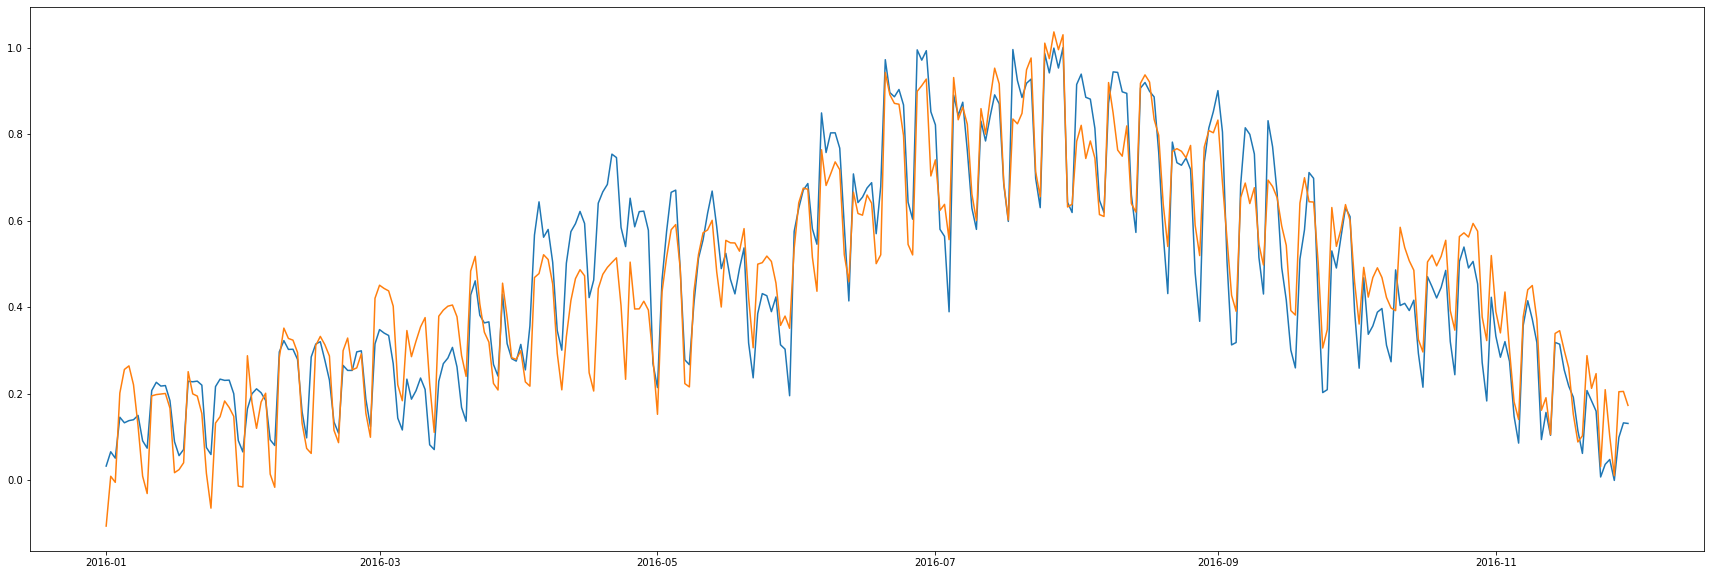

In [55]:
fig = plt.figure(figsize = (30,10))


plt.plot(y_train)
plt.plot(reg_pred)

In [56]:
scaled_daily_total2.head()

,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,holiday,Friday,Monday,...,Tuesday,Wednesday,hot,cold,cold_temperature,hot_temperature,cold_temperature^2,hot_temperature^2,winter,summer
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.033058,0.063726,0.171177,0.029630,0.831478,0.046512,0.007937,1,1,0,...,0,0,0,1,0.033058,0.0,0.001093,0.0,1,0
2016-01-02,0.066120,0.187973,0.319496,0.029630,0.862596,0.193202,0.361416,0,0,0,...,0,0,0,0,0.000000,0.0,0.000000,0.0,1,0
2016-01-03,0.051383,0.237082,0.315554,0.029630,0.825286,0.112701,0.436508,0,0,0,...,0,0,0,0,0.000000,0.0,0.000000,0.0,1,0
2016-01-04,0.145984,0.246185,0.381372,0.237037,0.701991,0.148479,0.438950,0,0,1,...,0,0,0,0,0.000000,0.0,0.000000,0.0,1,0
2016-01-05,0.133124,0.143223,0.629007,0.325926,0.736714,0.259392,0.409646,0,0,0,...,1,0,0,1,0.133124,0.0,0.017722,0.0,1,0


In [57]:
X_test = scaled_daily_total2_test.iloc[:,1:]
y_test = scaled_daily_total2_test.iloc[:,0]

In [58]:
X_test.head()

,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,holiday,Friday,Monday,Saturday,...,Tuesday,Wednesday,hot,cold,cold_temperature,hot_temperature,cold_temperature^2,hot_temperature^2,winter,summer
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-12-01,0.090524,0.206910,0.02963,0.763521,0.502683,0.246032,0,0,0,0,...,0,0,0,1,0.124425,0.0,0.015482,0.0,1,0
2016-12-02,0.107321,0.251839,0.02963,0.715551,0.327370,0.202076,0,1,0,0,...,0,0,0,1,0.108085,0.0,0.011682,0.0,1,0
2016-12-03,0.137325,0.235681,0.02963,0.733657,0.792487,0.205128,0,0,0,1,...,0,0,0,1,0.047800,0.0,0.002285,0.0,1,0
2016-12-04,0.169381,0.182344,0.02963,0.784919,0.076923,0.028694,0,0,0,0,...,0,0,0,0,0.000000,0.0,0.000000,0.0,1,0
2016-12-05,0.162072,0.172491,0.02963,0.739771,0.225403,0.231380,0,0,1,0,...,0,0,0,1,0.119689,0.0,0.014325,0.0,1,0


In [59]:
X_test[result].shape

(31, 14)

In [60]:
X_train[result].shape

(335, 14)

In [62]:
import matplotlib.pyplot as plt

In [63]:
result

['air_temperature',
 'Sunday',
 'Saturday',
 'holiday',
 'summer',
 'cold',
 'winter',
 'dew_temperature',
 'hot_temperature^2',
 'hot',
 'wind_speed',
 'sea_level_pressure',
 'Friday',
 'wind_direction']

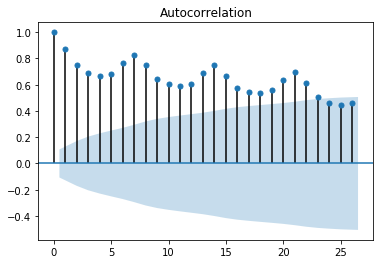

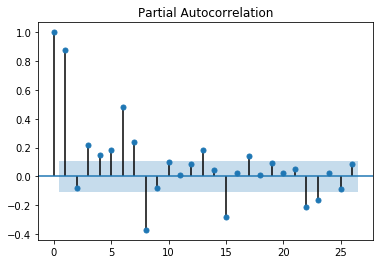

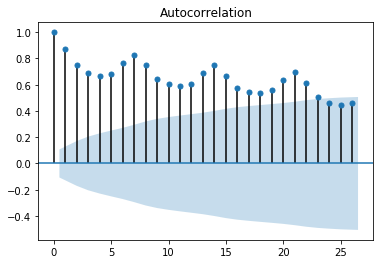

In [64]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_pacf(y_train)
plot_acf(y_train)

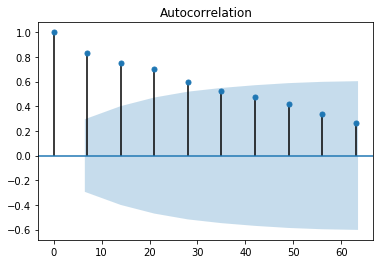

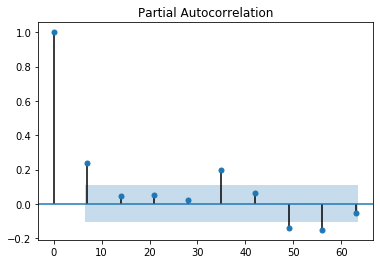

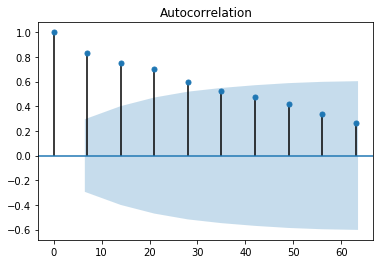

In [65]:
plot_pacf(y_train, lags=np.arange(10)*7)
plot_acf(y_train, lags = np.arange(10)*7)

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [67]:
selected_X_train = X_train[result]

In [ ]:
collection = pd.DataFrame(columns = ['p', 'd', 'q', 'P', 'D', 'Q', 'AIC', 'BIC'])


for p in range(3):
    for d in range(3):
        for q in range(3):
            for P in range(3):
                for D in range(3):
                    for Q in range(3):
                        
                        try:
        # Fit model
                            model = SARIMAX(endog = y_train,
                                exog = selected_X_train,
                                order = (p,d,q),
                                seasonal_order = (P,D,Q,7),
                                freq = "D")
                            results = model.fit()
# Print the model order and the AIC/BIC values
                            print(p, d, q, P, D, Q, results.aic, results.bic)
                            f = pd.DataFrame(np.array([p,d,q,P,D,Q, results.aic, results.bic]).reshape(1,-1),
                                             columns = ['p','d','q','P','D','Q','AIC','BIC']) 
                            collection = pd.concat([collection, f], axis = 0)
                            collection.to_csv("daily_parameters2.csv")
                        except:
# Print AIC and BIC as None when fails
                            print(p, d, q, P, D, Q, None, None)


In [68]:
selected_X_train

,air_temperature,Sunday,Saturday,holiday,summer,cold,winter,dew_temperature,hot_temperature^2,hot,wind_speed,sea_level_pressure,Friday,wind_direction
timestamp,,,,,,,,,,,,,,
2016-01-01,0.063726,0,0,1,0,1,1,0.171177,0.0,0,0.007937,0.831478,1,0.046512
2016-01-02,0.187973,0,1,0,0,0,1,0.319496,0.0,0,0.361416,0.862596,0,0.193202
2016-01-03,0.237082,1,0,0,0,0,1,0.315554,0.0,0,0.436508,0.825286,0,0.112701
2016-01-04,0.246185,0,0,0,0,0,1,0.381372,0.0,0,0.438950,0.701991,0,0.148479
2016-01-05,0.143223,0,0,0,0,1,1,0.629007,0.0,0,0.409646,0.736714,0,0.259392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-26,0.346326,0,1,0,0,0,1,0.306358,0.0,0,0.347985,0.785154,0,0.139535
2016-11-27,0.245288,1,0,0,0,0,1,0.406332,0.0,0,0.427961,0.726916,0,0.570662
2016-11-28,0.098218,0,0,0,0,1,1,0.511561,0.0,0,0.333333,0.711475,0,0.345259


In [69]:
selected_model1 = SARIMAX(endog = y_train,
                                exog = selected_X_train,
                                order = (1,1,2),
                                seasonal_order = (1,0,0,7))

selected_results1 = selected_model1.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [70]:
selected_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                     meter_reading   No. Observations:                  335
Model:             SARIMAX(1, 1, 2)x(1, 0, 0, 7)   Log Likelihood                 510.999
Date:                           Tue, 03 Dec 2019   AIC                           -983.999
Time:                                   16:17:01   BIC                           -911.587
Sample:                               01-01-2016   HQIC                          -955.127
                                    - 11-30-2016                                         
Covariance Type:                             opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
air_temperature        0.5777      0.062      9.335      0.000       0.456       0.699
Sunday                -0.2178      0.008    -27.821      0.000      -0.233      -0.202
Saturday              -0.1766      0.011    -16.641      0.000      -0.197      -0.156
holiday               -0.1765      0.008    -21.146      0.000      -0.193      -0.160
summer                 0.0212      0.041      0.520      0.603      -0.059       0.101
cold                   0.0250      0.026      0.950      0.342      -0.027       0.077
winter                -0.0101      0.044     -0.228      0.819      -0.097       0.077
dew_temperature        0.1648      0.028      5.829      0.000       0.109       0.220
hot_temperature^2      0.2644      0.027      9.629      0.000       0.211       0.318
hot                   -0.1639      0.018     -9.091      0.000      -0.199      -0.129
wind_speed            -0.0314      0.032     -0.973      0.331      -0.095       0.032
sea_level_pressure     0.2216      0.073      3.021      0.003       0.078       0.365
Friday                -0.0307      0.011     -2.865      0.004      -0.052      -0.010
wind_direction         0.0155      0.022      0.713      0.476      -0.027       0.058
ar.L1                  0.5316      0.124      4.274      0.000       0.288       0.775
ma.L1                 -0.7966      0.145     -5.501      0.000      -1.080      -0.513
ma.L2                 -0.0642      0.099     -0.648      0.517      -0.258       0.130
ar.S.L7                0.1437      0.060      2.376      0.018       0.025       0.262
sigma2                 0.0027      0.000     15.005      0.000       0.002       0.003
===================================================================================
Ljung-Box (Q):                       45.51   Jarque-Bera (JB):                36.30
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.16
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

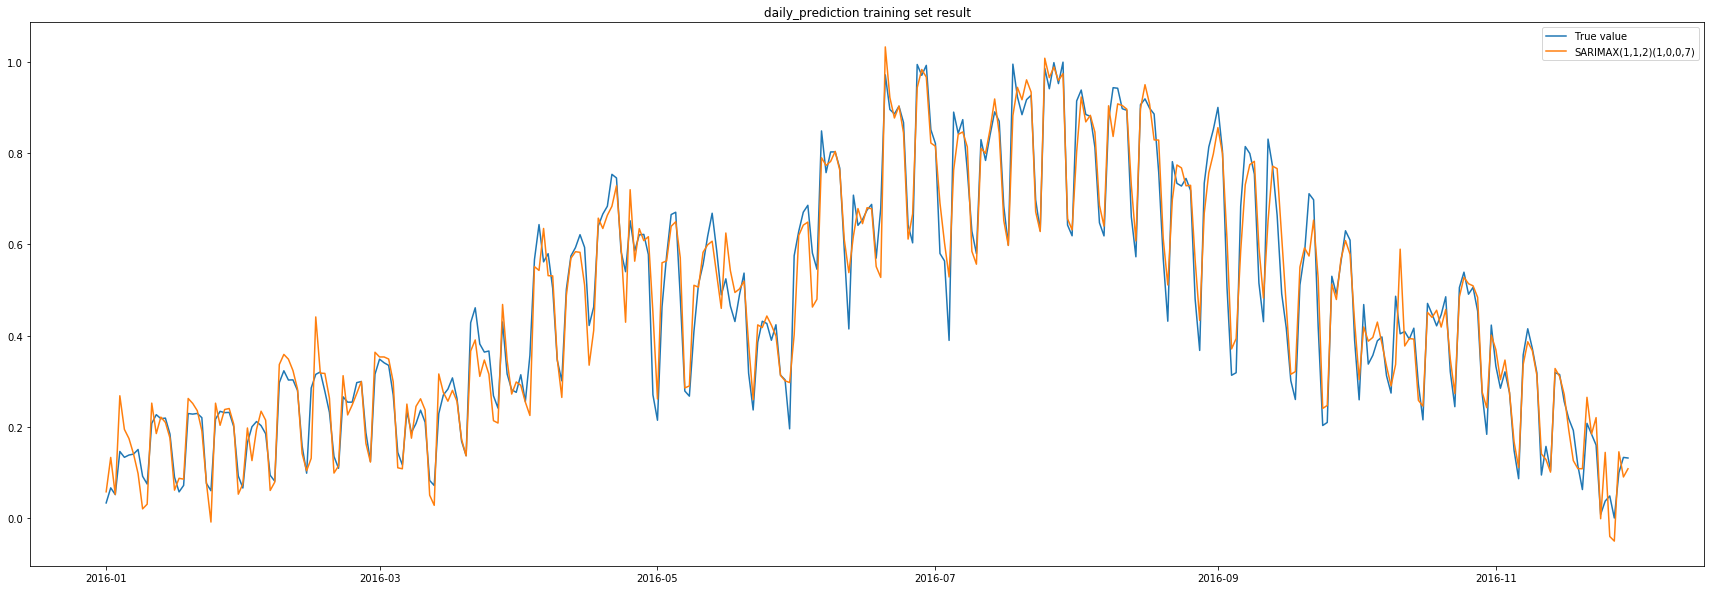

In [71]:
fig = plt.figure(figsize=(30,10))

plt.title('daily_prediction training set result')
plt.plot(y_train, label = 'True value')
plt.plot(selected_results1.predict(), label = 'SARIMAX(1,1,2)(1,0,0,7)')


plt.legend()

In [87]:
selected_X_test = X_test[result]

In [90]:
pred3 = selected_results1.predict(exog = selected_X_test, start = '2016-12-01', end = '2016-12-31')

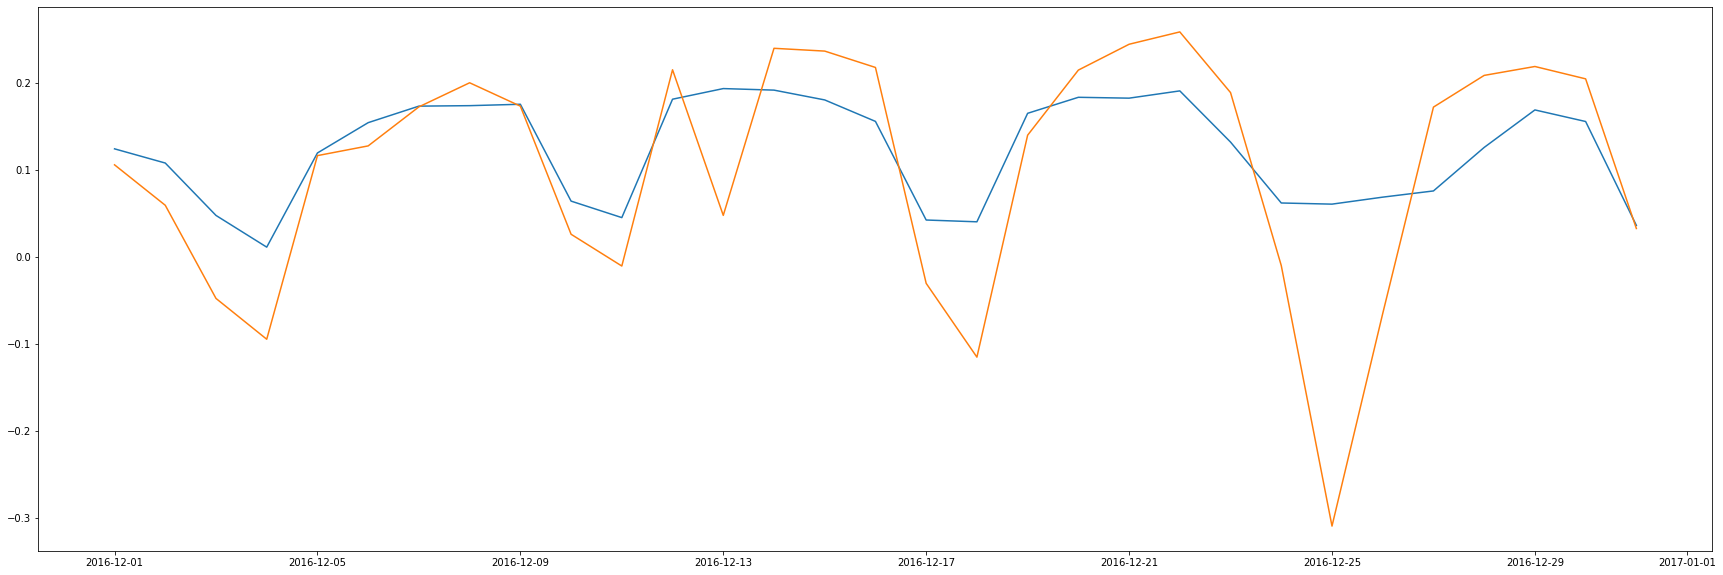

In [91]:

fig = plt.figure(figsize=(30,10))

plt.plot(y_test)
plt.plot(pred3)

In [75]:
pred_portion = pd.read_csv("mer_portion_yhat.csv", header = None)

In [78]:
pred_portion = pred_portion.rename(columns = {0:'portion_yhat'})

In [79]:
pred_portion.head()

,portion_yhat
0,0.033315
1,0.032182
2,0.032741
3,0.033756
4,0.035290


In [80]:
pred_portion.shape

(744, 1)

In [107]:
day2 = pd.to_datetime(data.timestamp).dt.strftime("%Y-%m-%d").rename(columns = {'timestamp':'day'})

In [108]:
day2.head()

0    2016-01-01
1    2016-01-01
2    2016-01-01
3    2016-01-01
4    2016-01-01
dtype: object

In [109]:
pportion = pd.concat([day2[-744:].reset_index(drop=True), pred_portion], axis = 1)

In [110]:
pportion.tail()

,0,portion_yhat
739,2016-12-31,0.041490
740,2016-12-31,0.040332
741,2016-12-31,0.040385
742,2016-12-31,0.040282
743,2016-12-31,0.037931


In [112]:
pportion = pportion.rename(columns = {0:'day'})

In [113]:
pportion.head()

,day,portion_yhat
0,2016-12-01,0.033315
1,2016-12-01,0.032182
2,2016-12-01,0.032741
3,2016-12-01,0.033756
4,2016-12-01,0.035290


In [117]:
tmp_day = pd.concat([data.iloc[-744:,0].reset_index(drop = True), pportion], axis=1)

In [103]:
pred3.shape

(31,)

In [120]:
pred3.head()

2016-12-01    0.106030
2016-12-02    0.059480
2016-12-03   -0.047704
2016-12-04   -0.094660
2016-12-05    0.116627
Freq: D, dtype: float64

In [125]:
pred3 = pred3.reset_index().rename(columns = {'index' : 'day', 0 :'pred_day_sum'})

In [132]:
import datetime

In [148]:
pred3['day'] = pred3.day.dt.strftime("%Y-%m-%d")

In [149]:
pred3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
day             31 non-null object
pred_day_sum    31 non-null float64
dtypes: float64(1), object(1)
memory usage: 624.0+ bytes


In [151]:
ready_portion = pd.merge(pportion, pred3 , on='day')

In [152]:
ready_portion.head()

,day,portion_yhat,pred_day_sum
0,2016-12-01,0.033315,0.10603
1,2016-12-01,0.032182,0.10603
2,2016-12-01,0.032741,0.10603
3,2016-12-01,0.033756,0.10603
4,2016-12-01,0.035290,0.10603


In [180]:
maxx = np.max(daily_total2.meter_reading)
minn = np.min(daily_total2.meter_reading)

4352.070941905643

In [178]:
ready_portion['pred_day_sum']*(maxx-minn)+minn

0      1678.136719
1      1678.136719
2      1678.136719
3      1678.136719
4      1678.136719
          ...     
739    1458.947024
740    1458.947024
741    1458.947024
742    1458.947024
743    1458.947024
Name: pred_day_sum, Length: 744, dtype: float64

In [181]:
ready_portion['predicted_meter_reading'] = ready_portion['portion_yhat'] * (ready_portion['pred_day_sum']*(maxx-minn)+minn)

In [182]:
ready_portion.head()

,day,portion_yhat,pred_day_sum,predicted_meter_reading
0,2016-12-01,0.033315,0.10603,55.907080
1,2016-12-01,0.032182,0.10603,54.005716
2,2016-12-01,0.032741,0.10603,54.944029
3,2016-12-01,0.033756,0.10603,56.647213
4,2016-12-01,0.035290,0.10603,59.221912


In [183]:
hourly_converted_prediction = ready_portion['portion_yhat'] * (ready_portion['pred_day_sum']*(maxx-minn)+minn)

In [184]:
hourly_converted_prediction

0      55.907080
1      54.005716
2      54.944029
3      56.647213
4      59.221912
         ...    
739    60.531070
740    58.842432
741    58.919141
742    58.769793
743    55.339280
Length: 744, dtype: float64

In [185]:
data['meter_reading'][-744:]

8040    55.518421
8041    54.857128
8042    55.526070
8043    57.212213
8044    60.633104
          ...    
8779    60.630587
8780    60.542455
8781    60.398498
8782    56.430632
8783    55.440209
Name: meter_reading, Length: 744, dtype: float64

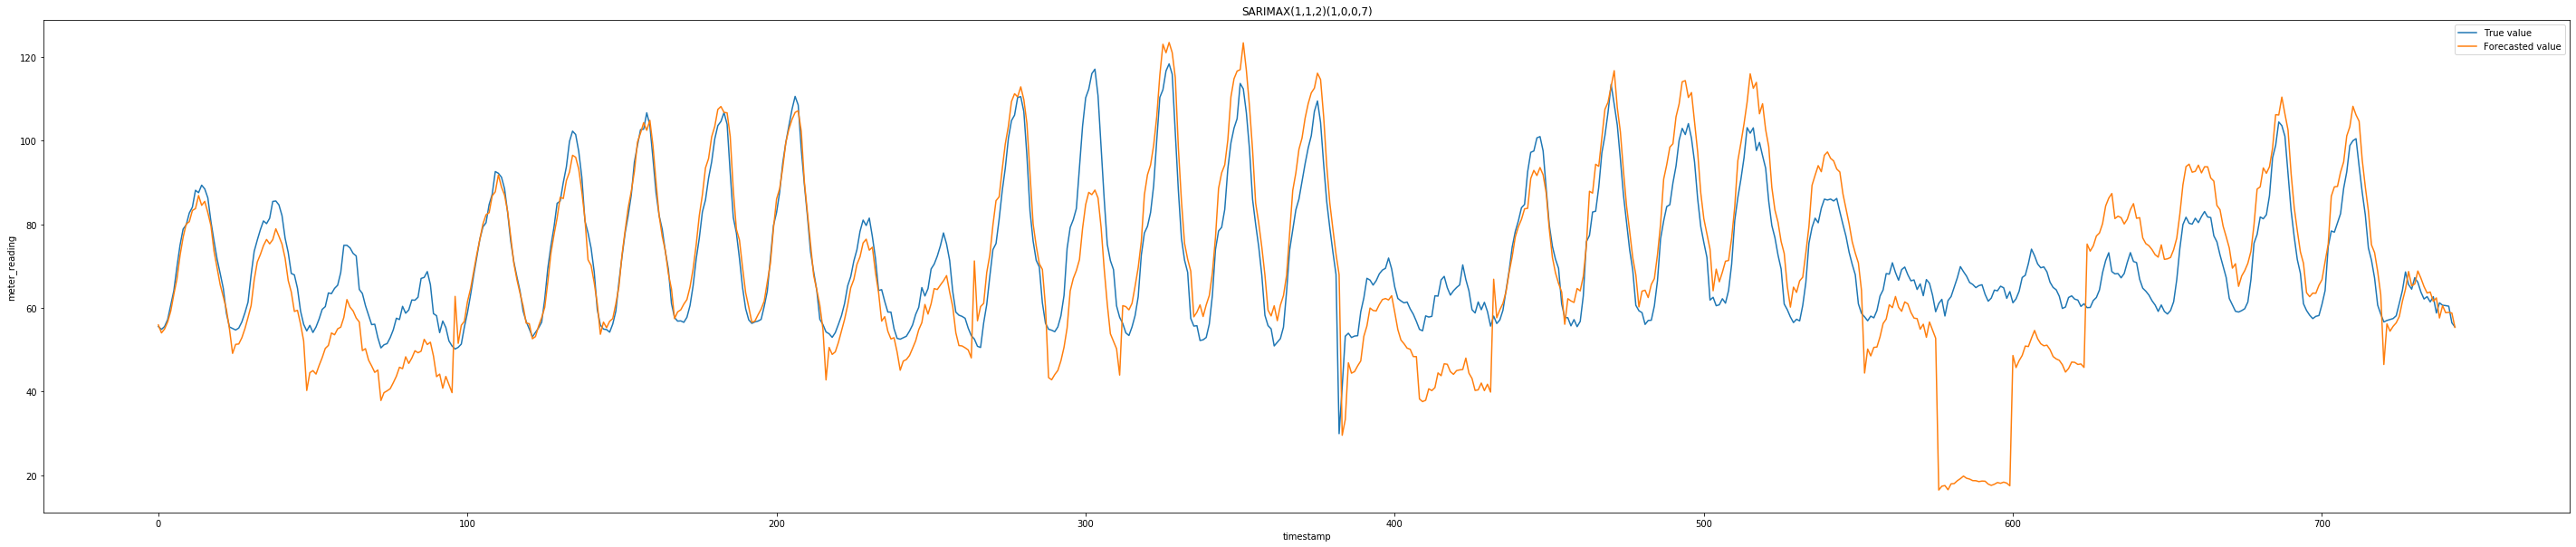

In [312]:
plt.figure(figsize=(50,10))


plt.title('SARIMAX(1,1,2)(1,0,0,7)')
plt.xlabel('timestamp')
plt.ylabel('meter_reading')
plt.plot(data['meter_reading'][-744:].reset_index(drop=True), label= 'True value')
plt.plot(hourly_converted_prediction, label = 'Forecasted value')
plt.savefig('SARIMAX(1,1,2)(1,0,0,7)')

plt.legend()

In [188]:
import math

In [190]:
from sklearn.metrics import mean_squared_error

In [191]:
rmse = math.sqrt(mean_squared_error(data['meter_reading'][-744:].reset_index(drop=True), hourly_converted_prediction))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 12.431


In [197]:
all_portion = pd.read_csv("mer_portion.csv")

In [199]:
all_portion=all_portion[['timestamp','portion']]

In [200]:
all_portion.head()

,timestamp,portion
0,2016-01-01 00:00:00,0.040700
1,2016-01-01 01:00:00,0.040620
2,2016-01-01 02:00:00,0.041360
3,2016-01-01 03:00:00,0.042800
4,2016-01-01 04:00:00,0.043855


In [201]:
all_portion.tail()

,timestamp,portion
8779,2016-12-31 19:00:00,0.041253
8780,2016-12-31 20:00:00,0.041193
8781,2016-12-31 21:00:00,0.041095
8782,2016-12-31 22:00:00,0.038395
8783,2016-12-31 23:00:00,0.037721


In [202]:
all_portion.shape

(8784, 2)

In [217]:
day4 = pd.to_datetime(all_portion['timestamp']).dt.strftime("%Y-%m-%d")

In [212]:
day4.head()

0    2016-01-01
1    2016-01-01
2    2016-01-01
3    2016-01-01
4    2016-01-01
Name: timestamp, dtype: object

In [275]:
all_portion2 = pd.concat([all_portion,day4], axis=1)

In [220]:
all_portion2.tail()

,timestamp,portion,timestamp
8779,2016-12-31 19:00:00,0.041253,2016-12-31
8780,2016-12-31 20:00:00,0.041193,2016-12-31
8781,2016-12-31 21:00:00,0.041095,2016-12-31
8782,2016-12-31 22:00:00,0.038395,2016-12-31
8783,2016-12-31 23:00:00,0.037721,2016-12-31


In [223]:
s = pd.concat([all_portion2, selected_results1.predict().reset_index(drop=True)], axis=1)

In [231]:
selected_results1.predict()

2016-01-01    0.057474
2016-01-02    0.132911
2016-01-03    0.051520
2016-01-04    0.268164
2016-01-05    0.194426
                ...   
2016-11-26   -0.040502
2016-11-27   -0.050641
2016-11-28    0.145248
2016-11-29    0.089983
2016-11-30    0.108026
Freq: D, Length: 335, dtype: float64

In [235]:
selected_results1.predict().reset_index(drop=True)

0      0.057474
1      0.132911
2      0.051520
3      0.268164
4      0.194426
         ...   
330   -0.040502
331   -0.050641
332    0.145248
333    0.089983
334    0.108026
Length: 335, dtype: float64

In [246]:
all_predict = selected_results1.predict().reset_index(drop=True).append(pred3.pred_day_sum)

In [287]:
all_predict = all_predict.reset_index(drop=True)

In [241]:
all_predict.head()

0    0.057474
1    0.132911
2    0.051520
3    0.268164
4    0.194426
dtype: float64

In [248]:
all_predict = pd.DataFrame(all_predict, columns = ['daily_prediction'])

In [249]:
all_predict.head()

,daily_prediction
0,0.057474
1,0.132911
2,0.051520
3,0.268164
4,0.194426


In [288]:
all_predict['day'] = daily_total2['timestamp'].copy()

In [289]:
all_predict

,daily_prediction,day
0,0.057474,2016-01-01
1,0.132911,2016-01-02
2,0.051520,2016-01-03
3,0.268164,2016-01-04
4,0.194426,2016-01-05
...,...,...
361,0.172440,2016-12-27
362,0.208932,2016-12-28
363,0.219180,2016-12-29
364,0.204957,2016-12-30


In [265]:
all_portion2['day'] = ttmp

In [277]:
all_portion2.columns= ['timestamp', 'portion', 'day']

In [278]:
all_portion2.head()

,timestamp,portion,day
0,2016-01-01 00:00:00,0.040700,2016-01-01
1,2016-01-01 01:00:00,0.040620,2016-01-01
2,2016-01-01 02:00:00,0.041360,2016-01-01
3,2016-01-01 03:00:00,0.042800,2016-01-01
4,2016-01-01 04:00:00,0.043855,2016-01-01


In [296]:
all_predict['day'] = all_predict.day.dt.strftime('%Y-%m-%d')

In [291]:
all_predict.tail()

,daily_prediction,day
361,0.172440,2016-12-27
362,0.208932,2016-12-28
363,0.219180,2016-12-29
364,0.204957,2016-12-30
365,0.032749,2016-12-31


In [298]:
tabulated_portion = pd.merge(all_portion2, all_predict, on = 'day')

In [299]:
tabulated_portion.head()

,timestamp,portion,day,daily_prediction
0,2016-01-01 00:00:00,0.040700,2016-01-01,0.057474
1,2016-01-01 01:00:00,0.040620,2016-01-01,0.057474
2,2016-01-01 02:00:00,0.041360,2016-01-01,0.057474
3,2016-01-01 03:00:00,0.042800,2016-01-01,0.057474
4,2016-01-01 04:00:00,0.043855,2016-01-01,0.057474


In [302]:
tabulated_portion['daily_prediction'] = tabulated_portion['daily_prediction']*(maxx-minn)+minn

In [303]:
tabulated_portion['predicted_value'] = tabulated_portion['portion'] * tabulated_portion['daily_prediction']

In [304]:
tabulated_portion.head()

,timestamp,portion,day,daily_prediction,predicted_value
0,2016-01-01 00:00:00,0.040700,2016-01-01,1532.90439,62.388545
1,2016-01-01 01:00:00,0.040620,2016-01-01,1532.90439,62.266363
2,2016-01-01 02:00:00,0.041360,2016-01-01,1532.90439,63.400646
3,2016-01-01 03:00:00,0.042800,2016-01-01,1532.90439,65.607988
4,2016-01-01 04:00:00,0.043855,2016-01-01,1532.90439,67.225976


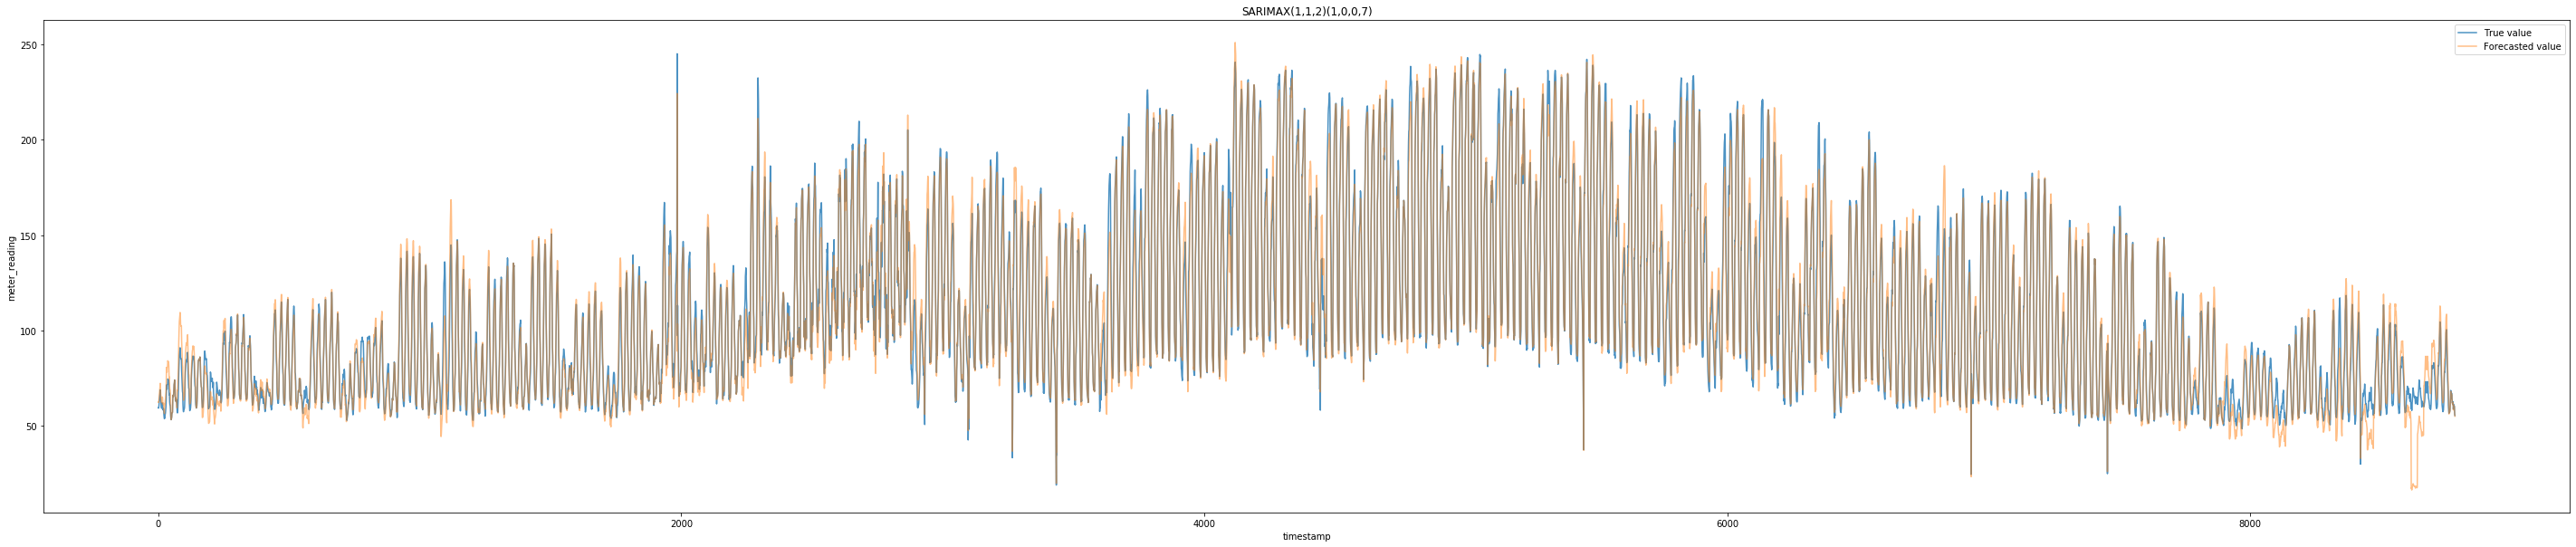

In [314]:
plt.figure(figsize=(50,10))

plt.title('SARIMAX(1,1,2)(1,0,0,7)')
plt.xlabel('timestamp')
plt.ylabel('meter_reading')
plt.plot(data['meter_reading'].reset_index(drop=True), alpha=0.8, label ='True value')
plt.plot(tabulated_portion.predicted_value, alpha=0.5, label = 'Forecasted value')

plt.legend()

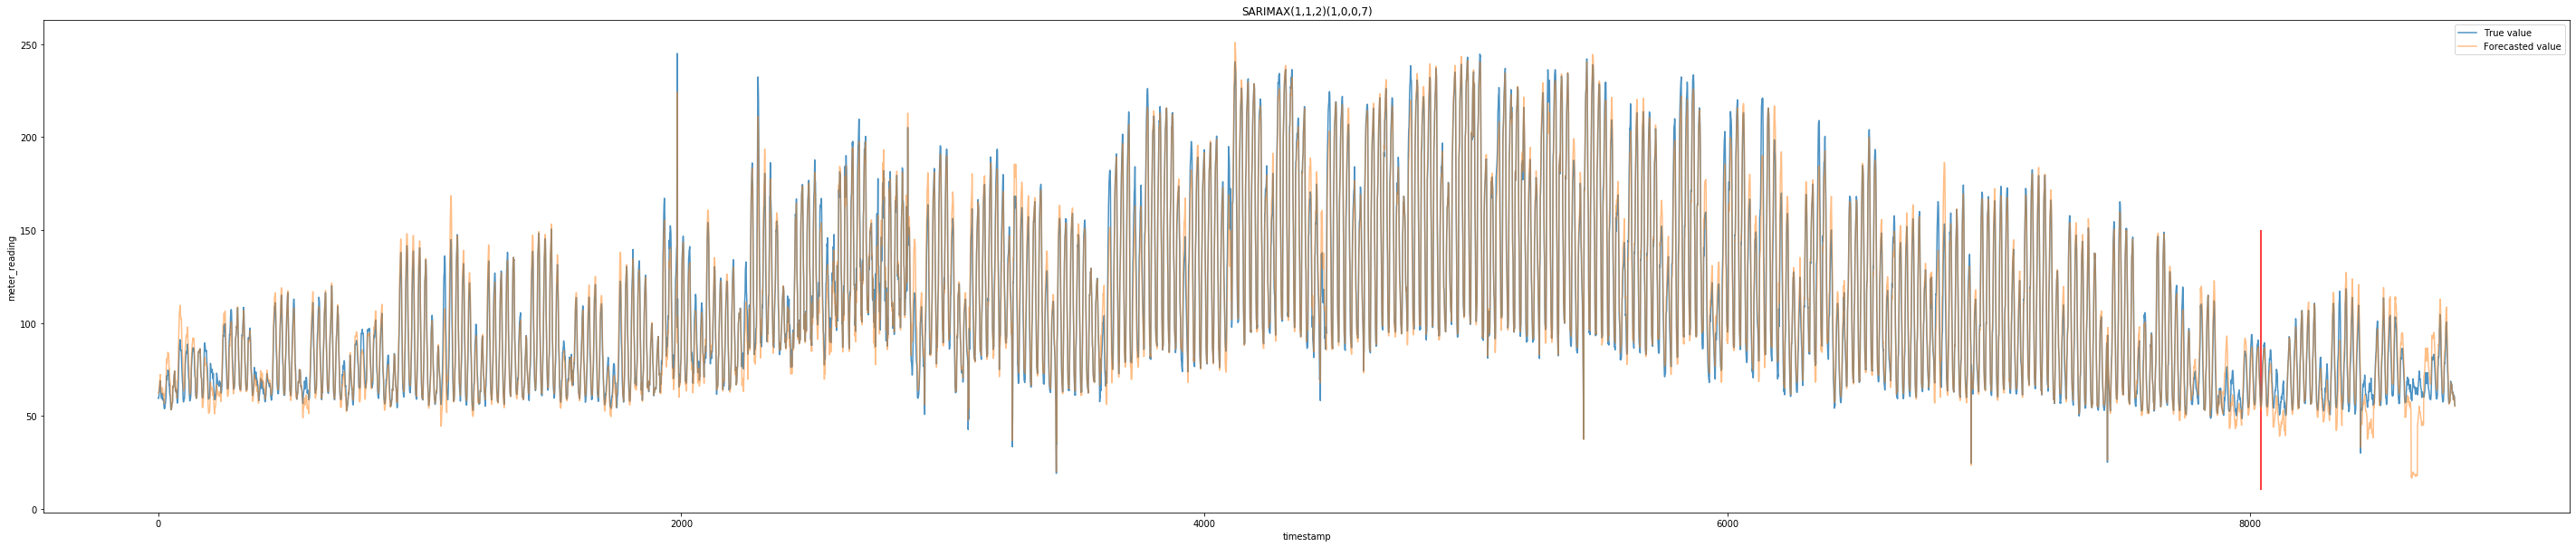

In [317]:
plt.figure(figsize=(50,10))

plt.title('SARIMAX(1,1,2)(1,0,0,7)')
plt.xlabel('timestamp')
plt.ylabel('meter_reading')
plt.plot(data['meter_reading'].reset_index(drop=True), alpha=0.8, label ='True value')
plt.plot(tabulated_portion.predicted_value, alpha=0.5, label = 'Forecasted value')
plt.vlines(8040, ymin =10, ymax=150, colors = 'r')

plt.legend()

In [ ]:
plt.figure(figsize=(50,10))

plt.plot(data['meter_reading'].reset_index(drop=True), alpha=0.8)dd
plt.plot(tabulated_portion.predicted_value, alpha=0.5)
plt.vlines(8040, ymin =500, ymax=7000, colors = 'r')

In [321]:
residual_error = data['meter_reading'] - tabulated_portion.predicted_value

In [323]:
residual_error_df = pd.DataFrame(residual_error).rename(columns = {0:'residual_error'})

In [325]:
residual_error_df.tail()

,residual_error
8779,0.444751
8780,0.444104
8781,0.443048
8782,0.413942
8783,0.406677


In [335]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [327]:
values =residual_error_df.values

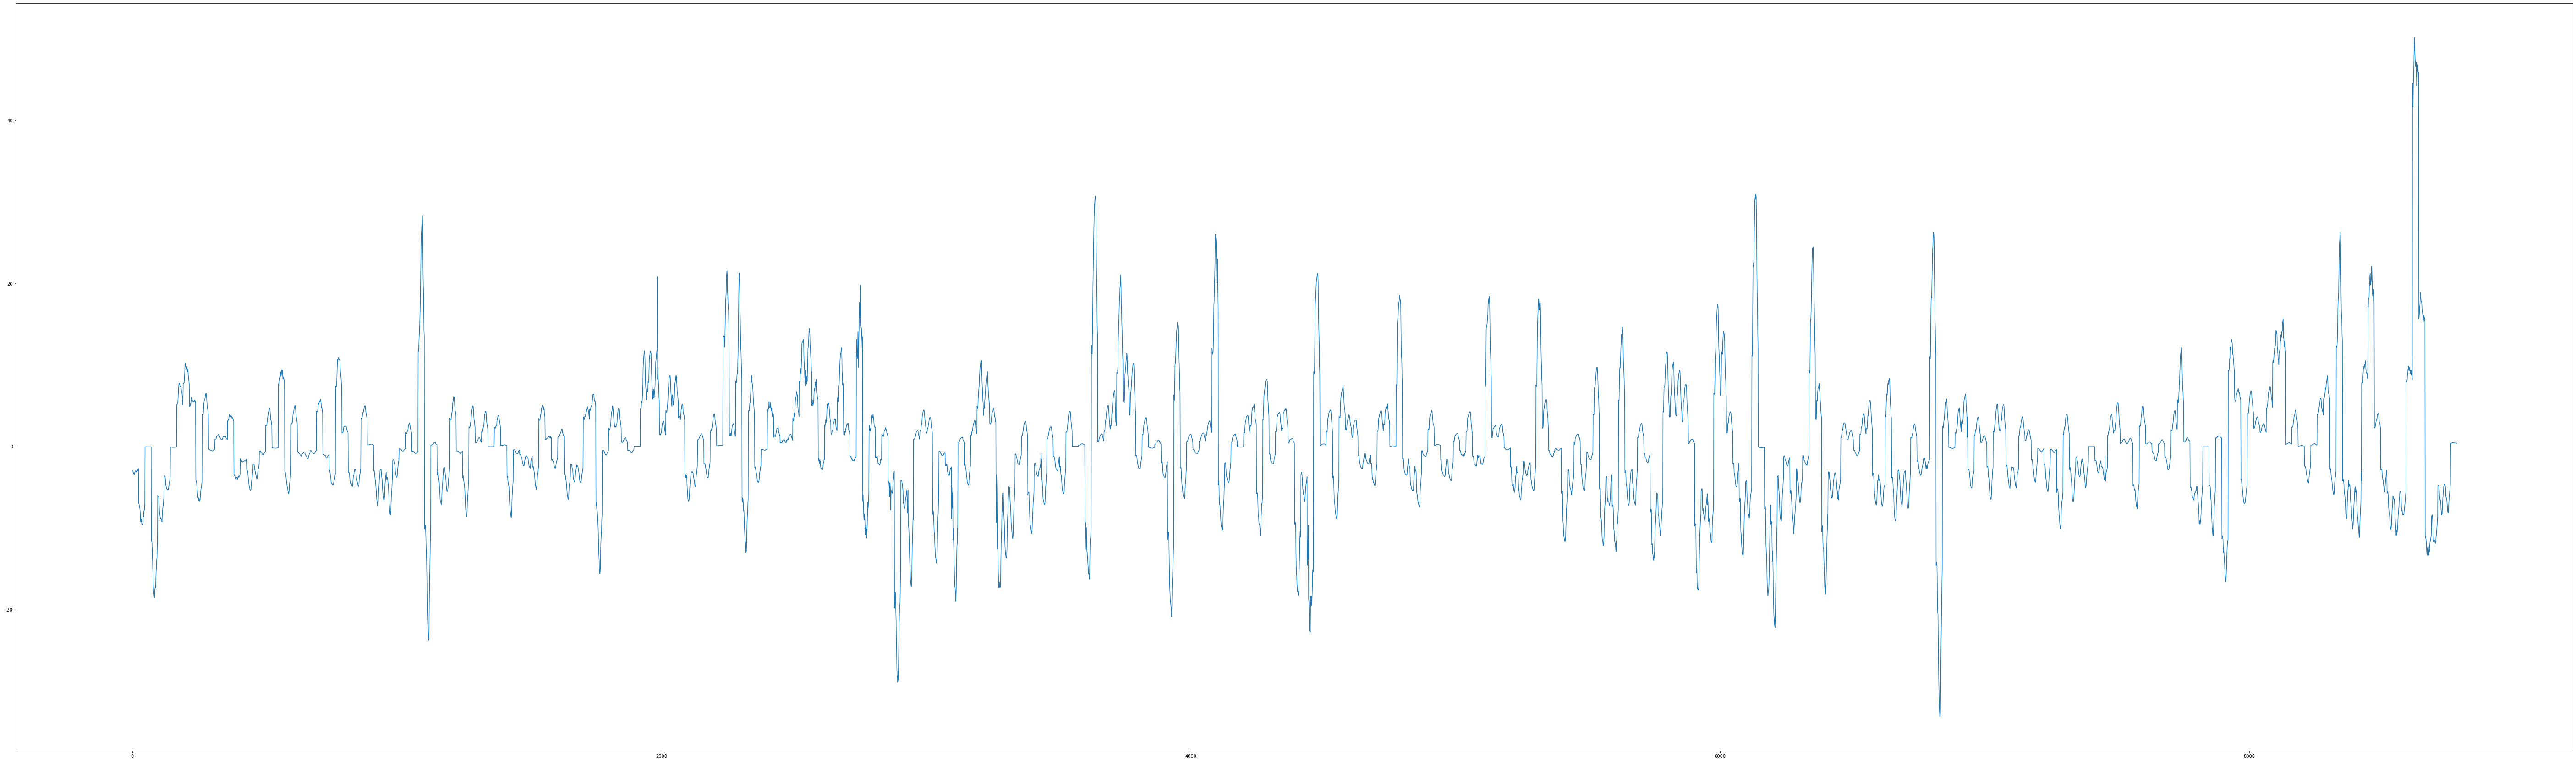

In [328]:
#EDA
plt.figure(figsize=(100,30))
plt.plot(values)
plt.show()

In [330]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [331]:
window_size = 24
# frame as supervised learning
reframed = series_to_supervised(values, 24, 1)
reframed.head()

,var1(t-24),var1(t-23),var1(t-22),var1(t-21),var1(t-20),var1(t-19),var1(t-18),var1(t-17),var1(t-16),var1(t-15),...,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
24,-2.972306,-2.966485,-3.020524,-3.125686,-3.202770,-3.269192,-3.344622,-3.443846,-3.310802,-3.170308,...,-3.103063,-3.083156,-2.920883,-2.926198,-2.953378,-2.938870,-2.801990,-2.723293,-2.687502,-6.956749
25,-2.966485,-3.020524,-3.125686,-3.202770,-3.269192,-3.344622,-3.443846,-3.310802,-3.170308,-3.105880,...,-3.083156,-2.920883,-2.926198,-2.953378,-2.938870,-2.801990,-2.723293,-2.687502,-6.956749,-6.945225
26,-3.020524,-3.125686,-3.202770,-3.269192,-3.344622,-3.443846,-3.310802,-3.170308,-3.105880,-2.992018,...,-2.920883,-2.926198,-2.953378,-2.938870,-2.801990,-2.723293,-2.687502,-6.956749,-6.945225,-7.186193
27,-3.125686,-3.202770,-3.269192,-3.344622,-3.443846,-3.310802,-3.170308,-3.105880,-2.992018,-2.963977,...,-2.926198,-2.953378,-2.938870,-2.801990,-2.723293,-2.687502,-6.956749,-6.945225,-7.186193,-7.273204
28,-3.202770,-3.269192,-3.344622,-3.443846,-3.310802,-3.170308,-3.105880,-2.992018,-2.963977,-2.960825,...,-2.953378,-2.938870,-2.801990,-2.723293,-2.687502,-6.956749,-6.945225,-7.186193,-7.273204,-7.466664


In [332]:
#split train and test
values=reframed.values
n_test_hours = 31*24
train = values[:-n_test_hours, :]
test = values[-n_test_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [333]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window_size, int(train_X.shape[1]/window_size)))
test_X = test_X.reshape((test_X.shape[0], window_size, int(test_X.shape[1]/window_size)))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8016, 24, 1) (8016,) (744, 24, 1) (744,)


In [336]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [337]:
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 8016 samples, validate on 744 samples
Epoch 1/100
 - 2s - loss: 3.1422 - val_loss: 4.7000
Epoch 2/100
 - 2s - loss: 1.6250 - val_loss: 3.2934
Epoch 3/100
 - 2s - loss: 1.1132 - val_loss: 2.6465
Epoch 4/100
 - 2s - loss: 0.9085 - val_loss: 2.3188
Epoch 5/100
 - 2s - loss: 0.7914 - val_loss: 2.1343
Epoch 6/100
 - 2s - loss: 0.7206 - val_loss: 1.9912
Epoch 7/100
 - 2s - loss: 0.6667 - val_loss: 1.8821
Epoch 8/100
 - 2s - loss: 0.6252 - val_loss: 1.7746
Epoch 9/100
 - 2s - loss: 0.5995 - val_loss: 1.7038
Epoch 10/100
 - 2s - loss: 0.5718 - val_loss: 1.6386
Epoch 11/100
 - 2s - loss: 0.5538 - val_loss: 1.6117
Epoch 12/100
 - 2s - loss: 0.5382 - val_loss: 1.5762
Epoch 13/100
 - 2s - loss: 0.5249 - val_loss: 1.5379
Epoch 14/100
 - 2s - loss: 0.5130 - val_loss: 1.4906
Epoch 15/100
 - 2s - loss: 0.5028 - val_loss: 1.4873
Epoch 16/100
 - 2s - loss: 0.4947 - val_loss: 1.4584
Epoch 17/100
 - 2s - loss: 0.4879 - val_loss: 1.4508
Epoch 18/100
 - 2s - loss: 0.4794 - val_loss: 1.4158
Epoch 1

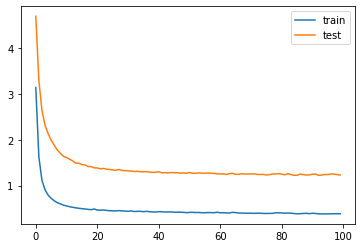

In [338]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [339]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], window_size*test_X.shape[2]))
test_X[:,1:]
# # invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:7]), axis=1)
inv_yhat = inv_yhat[:,0]

test_y
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:7]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4.135


In [343]:
def plot_series(time, series, format="-",start=0,end=None):
    plt.plot(time[start:end],series[start:end],format)
    plt.xlabel("Time")
    plt.ylabel("meter reading")
    plt.grid(True)

In [340]:
# plotting
r=np.concatenate((yhat, test_X[:, 1:7]), axis=1)
r=pd.DataFrame(r)

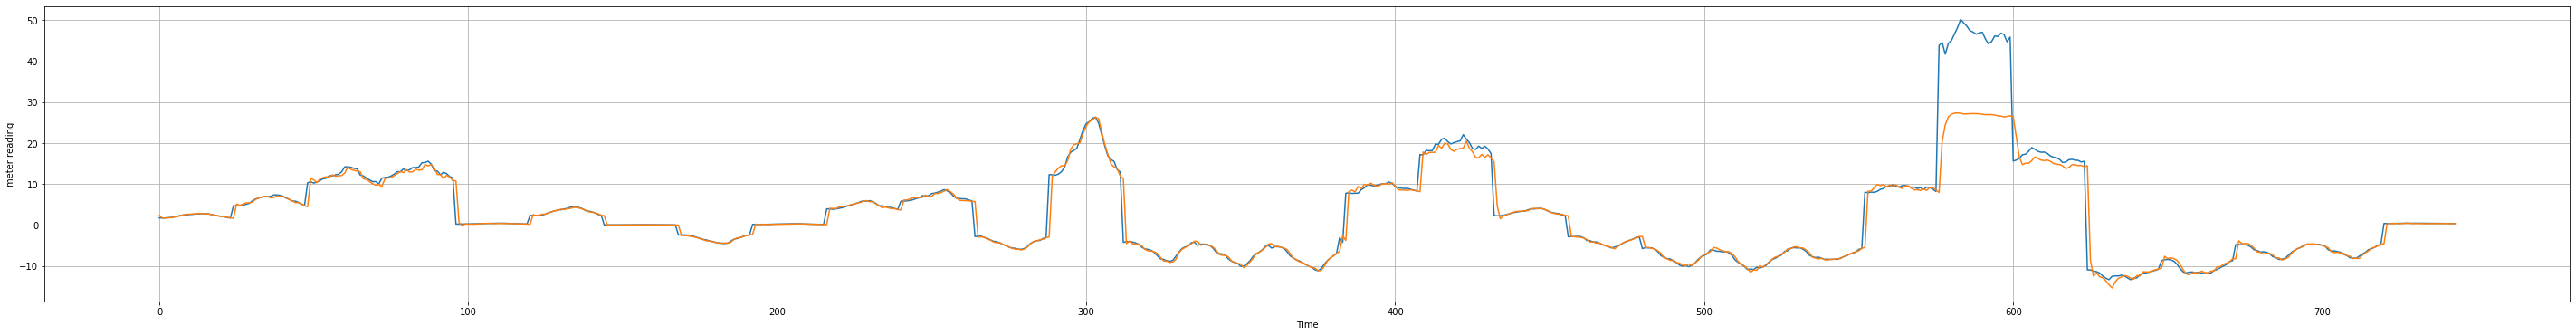

In [344]:
series = inv_y
time_step=[]
for x in range(len(series)):
    time_step.append(x)
time=np.array(time_step)
plt.figure(figsize=(50, 6))
plot_series(time,series)
plot_series(time,r[0])

In [345]:
hybrid_prediction2 = inv_yhat + tabulated_portion.predicted_value[-744:]

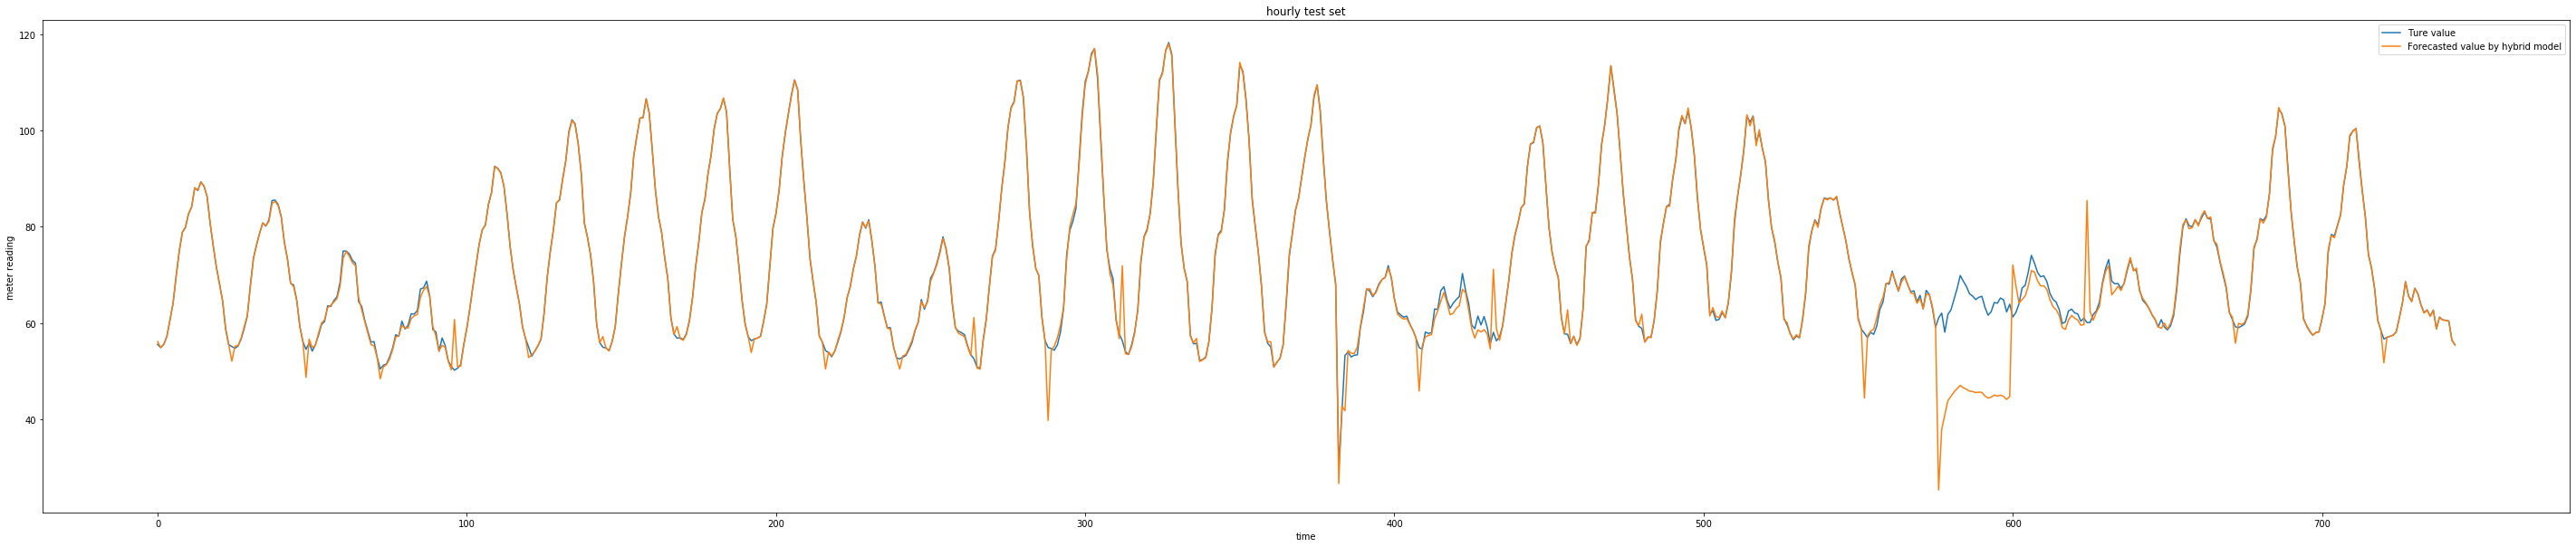

In [348]:
plt.figure(figsize=(50,10))

plt.title("hourly test set")
plt.xlabel("time")
plt.ylabel("meter reading")
plt.plot(data['meter_reading'][-744:].reset_index(drop=True), label = 'Ture value')
plt.plot(hybrid_prediction2.reset_index(drop=True), label='Forecasted value by hybrid model')
plt.legend()

In [349]:
rmse = math.sqrt(mean_squared_error(data['meter_reading'][-744:], hybrid_prediction2))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4.135
